In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read class data from csv and plot to dataframe
df = pd.read_csv("class_data.csv")
df.head()

,id,gender,instagram_followers,linkedin_con,texts_yesterday,phones_owned,apps_phone,os_phone,like_social,like_tech
0,1,male,0.0,642.0,47.0,7.0,101.0,Android,Undecided,Undecided
1,2,female,155.0,157.0,150.0,8.0,44.0,iOS,Agree,Agree
2,3,female,169.0,119.0,20.0,5.0,65.0,iOS,Agree,Agree
3,4,male,NaN,150.0,100.0,5.0,67.0,Android,Agree,Strongly agree
4,5,male,25.0,120.0,420.0,2.0,70.0,Android,Undecided,Agree


In [3]:
df['instagram_followers'].value_counts()

0.0        5
184.0      2
403.0      1
155.0      1
169.0      1
25.0       1
203.0      1
126.0      1
131.0      1
18000.0    1
350.0      1
285.0      1
105.0      1
102.0      1
568.0      1
163.0      1
268.0      1
745.0      1
Name: instagram_followers, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


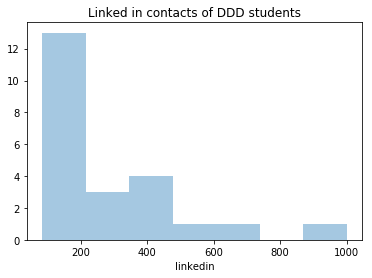

In [4]:
# Plotting a Histogram of linkedin contacts ( which is quantitative data)
df['linkedin_con'].name = 'linkedin' #Create variable for plotting

linkedin = df['linkedin_con'].dropna() #Selecting the linkedin column. Dropping NA values
sns.distplot(linkedin, kde=False) 

plt.title('Linked in contacts of DDD students')
#the plot is right skewed with some outlier values
plt.show()

The median number of linked in contants is: 280.95652173913044 people
The mean number of linkedin contacts is: 204.0 people


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


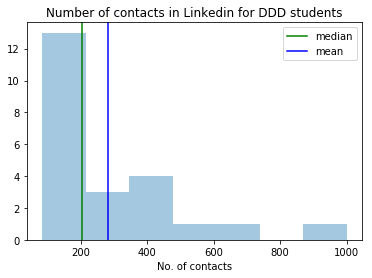

In [5]:
#verifying the skew by looking at mean and median values
linkedin_mean = df['linkedin_con'].mean()
linkedin_median = df['linkedin_con'].median()

print(f'The median number of linked in contants is: {linkedin_mean} people')
print(f'The mean number of linkedin contacts is: {linkedin_median} people')

#note: need to copy code
sns.distplot(linkedin, kde=False) 
plt.title('Number of contacts in Linkedin for DDD students')
plt.xlabel("No. of contacts")
plt.axvline(linkedin_median, 0, 100, color='green', label='median') #This adds a vertical line at x-position median_size, from y = 0 to y = 100 
plt.axvline(linkedin_mean, 0, 100, color='blue', label='mean') 
plt.legend() #This adds a legend. It works automatically because I've set the labels in the previous lines
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


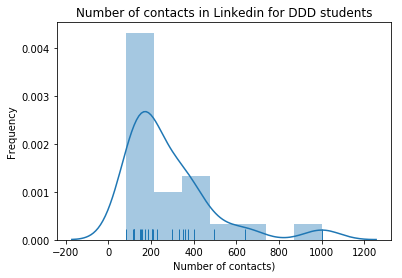

In [6]:
sns.distplot(linkedin, rug=True)
plt.title('Number of contacts in Linkedin for DDD students')
plt.xlabel('Number of contacts)')
plt.ylabel('Frequency')
plt.show()

In [7]:
df["apps_phone"].value_counts().head(10)

65.0      2
70.0      2
45.0      1
2999.0    1
44.0      1
67.0      1
42.0      1
49.0      1
132.0     1
152.0     1
Name: apps_phone, dtype: int64

In [8]:
df['apps_phone'] = df['apps_phone'].apply(pd.to_numeric, errors='coerce')
#To remove the the outlier of phones above 150 we need to create a function that we then apply to the entire column
def above_150(x):
    if(x > 150.0): 
        return float('NaN')
    else: 
        return x
df['apps_phone'] = df['apps_phone'].apply(above_150)

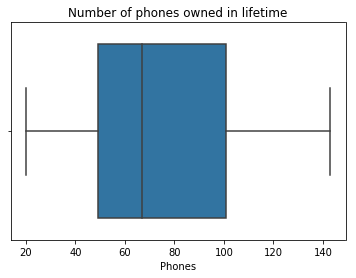

In [9]:
#there is a 2999 value that really skews the data. Realistically speaking it seems to be incorrect data. So filtered that out
#plot a box plot of number of phone owned
sns.boxplot(df['apps_phone'])
plt.title('Number of phones owned in lifetime')
plt.xlabel('Phones')
plt.show()

In [10]:
insta = df[df["instagram_followers"]<500]
insta.head()

,id,gender,instagram_followers,linkedin_con,texts_yesterday,phones_owned,apps_phone,os_phone,like_social,like_tech
0,1,male,0.0,642.0,47.0,7.0,101.0,Android,Undecided,Undecided
1,2,female,155.0,157.0,150.0,8.0,44.0,iOS,Agree,Agree
2,3,female,169.0,119.0,20.0,5.0,65.0,iOS,Agree,Agree
4,5,male,25.0,120.0,420.0,2.0,70.0,Android,Undecided,Agree
5,6,male,0.0,187.0,20.0,4.0,42.0,Android,Agree,Agree


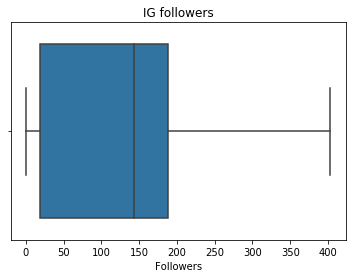

In [11]:
sns.boxplot(insta["instagram_followers"])
plt.title('IG followers')
plt.xlabel('Followers')
plt.show()

In [12]:
#previeweing data for violin plot
df["texts_yesterday"].value_counts()
#the data ranges from 0 to 1000. 
#Sampled all the data because text includes whatsapp, messenger and others...plausible given the paucity of user info

150.0     3
0.0       2
20.0      2
85.0      2
80.0      1
27.0      1
100.0     1
420.0     1
143.0     1
1000.0    1
60.0      1
200.0     1
21.0      1
112.0     1
76.0      1
50.0      1
40.0      1
34.0      1
47.0      1
Name: texts_yesterday, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


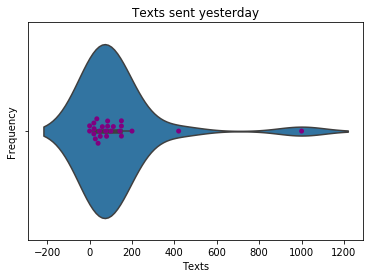

In [13]:
#Violin plot of texts_yesterday
sns.violinplot(df["texts_yesterday"])
sns.swarmplot(df["texts_yesterday"], color='purple') #default color doesn't stand out
plt.title('Texts sent yesterday')
plt.ylabel('Frequency')
plt.xlabel('Texts')
plt.show()

In [14]:
#investigate relationship between variables
df.head()

,id,gender,instagram_followers,linkedin_con,texts_yesterday,phones_owned,apps_phone,os_phone,like_social,like_tech
0,1,male,0.0,642.0,47.0,7.0,101.0,Android,Undecided,Undecided
1,2,female,155.0,157.0,150.0,8.0,44.0,iOS,Agree,Agree
2,3,female,169.0,119.0,20.0,5.0,65.0,iOS,Agree,Agree
3,4,male,NaN,150.0,100.0,5.0,67.0,Android,Agree,Strongly agree
4,5,male,25.0,120.0,420.0,2.0,70.0,Android,Undecided,Agree


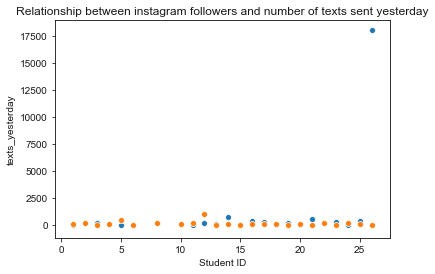

In [15]:
#using scatter plots to investigate relationship between intagram followers and texts sent yesterday

sns.scatterplot(y=df['instagram_followers'], x=df['id'], data=df)
plt.xlabel('ID')
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.scatterplot(y=df['texts_yesterday'], x=df['id'], data=df)
plt.title('Relationship between instagram followers and number of texts sent yesterday')
plt.xlabel('Student ID')
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.show()

#plot output is not very clear ... so I am going to try the same method but with the outliers filtered out

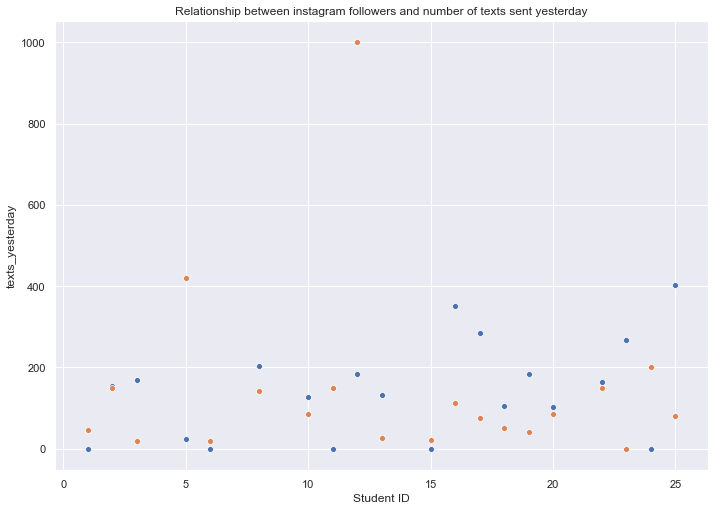

In [17]:
#using the insta datafram the results are much clearer
sns.scatterplot(y=insta['instagram_followers'], x=insta['id'], data=insta)
plt.xlabel('Student ID')
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.scatterplot(y=insta['texts_yesterday'], x=insta['id'], data=insta)
plt.title('Relationship between instagram followers and number of texts sent yesterday')
plt.xlabel('Student ID')
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.show()
#also do how do i set the x-label with a legend

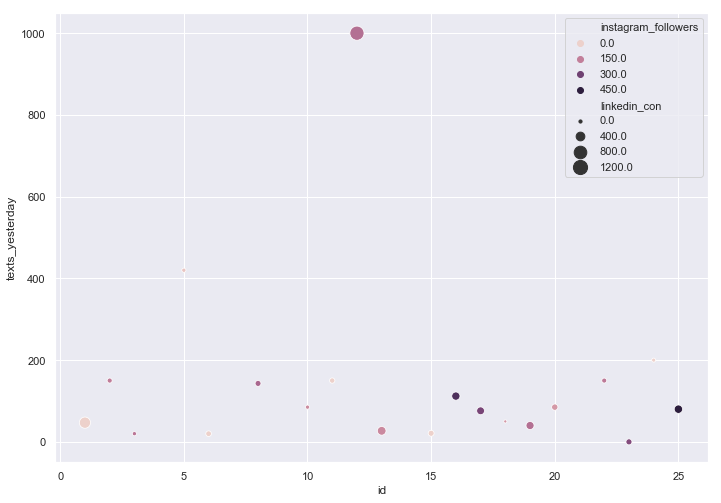

In [21]:
#exploring a differnt kind of scatterplot 
# instagram followers is set as hue and adding the number of linkedin contacts
#still using the insta datframe with the filtered out values
sns.scatterplot(x="id", y="texts_yesterday",
                     hue="instagram_followers", size="linkedin_con",
                     sizes=(10, 200),
                     data=insta)
#the output seems to show people who sent more texts have marginally larger instagram followers and linkedin contacts 
#however there's still an outlier for linkedn_con
# the outlier was filtered out in the df dataframe but not intsa:which is the one I am using
#for future reference it might be better to do all the filtering into one dataframe 